In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

from clulib import parse_data

In [43]:
energy = 2000
pidata, _, _ = parse_data('pi0', energy)
gadata, _, _ = parse_data('gamma', energy)
print(pidata.shape, gadata.shape)

(75476, 25, 3) (96471, 25, 3)


In [4]:
from sklearn.model_selection import train_test_split

In [75]:
X = pidata[:, :, 0]
(X / X.sum(axis=1).reshape(-1, 1)).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [97]:
def preprocess_data(data):
    X = data[:, :, 0]
    sums = X.sum(axis=1)
    return X / sums.reshape(-1, 1), sums
#     return X, sums

In [98]:
def make_data(pidata, gadata):
    pidata0, epi = preprocess_data(pidata)
    gadata0, ega = preprocess_data(gadata)
    print(pidata0.shape)
    print(gadata0.shape)
    X = np.vstack((pidata0, gadata0))
    y = np.concatenate((
        np.zeros(pidata0.shape[0], dtype=int),
        np.ones(gadata0.shape[0], dtype=int)
    ))
    return train_test_split(X, y, test_size=0.2, random_state=47)

In [99]:
X_train, X_test, y_train, y_test = make_data(pidata, gadata)
X_train.shape

(75476, 25)
(96471, 25)


(137557, 25)

In [105]:
clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)

/home/vitaly/miniconda3/envs/nsu/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


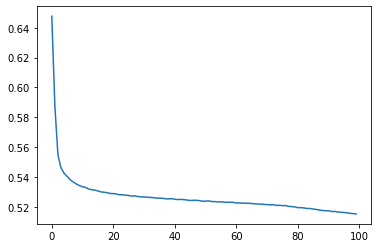

In [106]:
plt.plot(clf.loss_curve_)

In [107]:
clf.score(X_train, y_train)

0.753374964560146

In [108]:
clf.score(X_test, y_test)

0.7531549869148008

In [109]:
prob = clf.predict_proba(X_test)
prob[0]

array([0.22280783, 0.77719217])

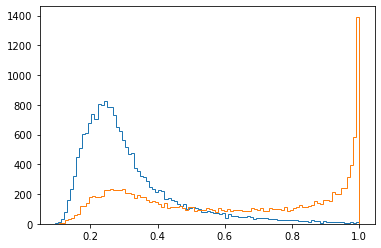

In [113]:
plt.hist(prob[y_test==1][:, 0], bins=100, histtype='step')
plt.hist(prob[y_test==0][:, 0], bins=100, histtype='step');

In [84]:
xpi, xga = X_train[y_train == 0], X_train[y_train != 0]

In [88]:
xpit, xgat = X_test[y_test == 0], X_test[y_test != 0]